In [ ]:
import warnings
warnings.filterwarnings("ignore")

# installing efficientNet source code
!pip install -U git+https://github.com/qubvel/efficientnet

In [2]:
import keras
from keras.datasets import cifar10
from keras.models import Model
from keras.layers import Dense, Dropout, Activation, BatchNormalization, Flatten
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.optimizers import Adam
import efficientnet.keras as enet


In [3]:
# loading Cifar-10 dataset

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

170498071/170498071 [==============================] - 13s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [ ]:
input_shape = (32, 32, 3) #Cifar10 image size
image_size = 224 #size after resizing image
num_classes = 10
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, BatchNormalization, Flatten, Dropout, Activation, Input
import tensorflow as tf

inputs = Input(shape=input_shape)
x = tf.keras.layers.Lambda(lambda image: tf.image.resize(image, (image_size, image_size)))(inputs) #Resize image to  size 224x224

model = enet.EfficientNetB7(include_top=False, input_shape=(224,224,3), pooling='avg', weights='imagenet')

x = model(x)

x = BatchNormalization()(x)
x = Dropout(0.7)(x)

x = Dense(512)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)

x = Dense(128)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

predictions = Dense(10, activation="softmax")(x)

model_final = Model(inputs = inputs, outputs = predictions)

model_final.summary()


In [5]:
for layer in model_final.layers:
    layer.trainable = True
model_final.compile(loss='categorical_crossentropy',
              optimizer=Adam(0.0001),
              metrics=['accuracy'])

mcp_save = ModelCheckpoint('EnetB7_CIFAR10_TL.h5', save_best_only=True, monitor='val_acc')
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=2, verbose=1,)

History = model_final.fit(x_train, y_train,
              batch_size=32,
              epochs=10,
              validation_split=0.1,
              callbacks=[mcp_save, reduce_lr],
              shuffle=True,
              verbose=1)

Epoch 1/10
1407/1407 [==============================] - ETA: 0s - loss: 2.0720 - accuracy: 0.2684

1407/1407 [==============================] - 76s 38ms/step - loss: 2.0720 - accuracy: 0.2684 - val_loss: 1.4106 - val_accuracy: 0.5180 - lr: 1.0000e-04
Epoch 2/10
1406/1407 [============================>.] - ETA: 0s - loss: 1.3340 - accuracy: 0.5367

1407/1407 [==============================] - 50s 35ms/step - loss: 1.3340 - accuracy: 0.5367 - val_loss: 0.9498 - val_accuracy: 0.6772 - lr: 1.0000e-04
Epoch 3/10
1406/1407 [============================>.] - ETA: 0s - loss: 1.0572 - accuracy: 0.6400

1407/1407 [==============================] - 50s 36ms/step - loss: 1.0573 - accuracy: 0.6400 - val_loss: 0.7794 - val_accuracy: 0.7384 - lr: 1.0000e-04
Epoch 4/10
1406/1407 [============================>.] - ETA: 0s - loss: 0.8938 - accuracy: 0.7007

1407/1407 [==============================] - 43s 31ms/step - loss: 0.8940 - accuracy: 0.7006 - val_loss: 0.6857 - val_accuracy: 0.7656 - lr: 1.0000e-04
Epoch 5/10
1407/1407 [==============================] - ETA: 0s - loss: 0.7846 - accuracy: 0.7362

1407/1407 [==============================] - 42s 30ms/step - loss: 0.7846 - accuracy: 0.7362 - val_loss: 0.6176 - val_accuracy: 0.7860 - lr: 1.0000e-04
Epoch 6/10
1406/1407 [============================>.] - ETA: 0s - loss: 0.7052 - accuracy: 0.7647

1407/1407 [==============================] - 47s 33ms/step - loss: 0.7052 - accuracy: 0.7647 - val_loss: 0.5816 - val_accuracy: 0.7990 - lr: 1.0000e-04
Epoch 7/10
1406/1407 [============================>.] - ETA: 0s - loss: 0.6254 - accuracy: 0.7901

1407/1407 [==============================] - 47s 34ms/step - loss: 0.6256 - accuracy: 0.7900 - val_loss: 0.5513 - val_accuracy: 0.8096 - lr: 1.0000e-04
Epoch 8/10
1406/1407 [============================>.] - ETA: 0s - loss: 0.5780 - accuracy: 0.8072

1407/1407 [==============================] - 44s 31ms/step - loss: 0.5780 - accuracy: 0.8072 - val_loss: 0.5247 - val_accuracy: 0.8170 - lr: 1.0000e-04
Epoch 9/10
1406/1407 [============================>.] - ETA: 0s - loss: 0.5252 - accuracy: 0.8232

1407/1407 [==============================] - 47s 33ms/step - loss: 0.5252 - accuracy: 0.8232 - val_loss: 0.5188 - val_accuracy: 0.8216 - lr: 1.0000e-04
Epoch 10/10
1406/1407 [============================>.] - ETA: 0s - loss: 0.4821 - accuracy: 0.8397

1407/1407 [==============================] - 63s 45ms/step - loss: 0.4821 - accuracy: 0.8397 - val_loss: 0.5240 - val_accuracy: 0.8196 - lr: 1.0000e-04


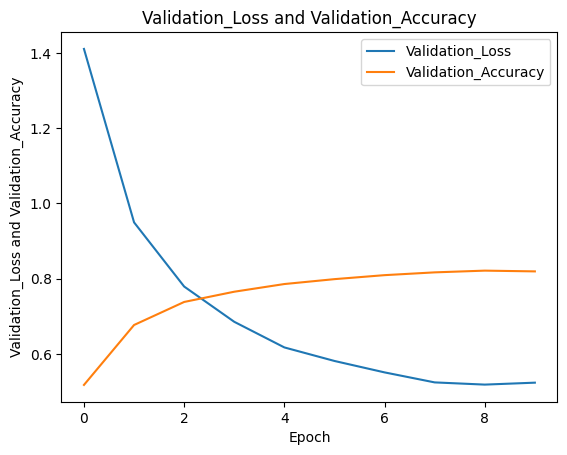

In [13]:
import matplotlib.pyplot as plt
plt.plot(History.history['val_loss'],label='Validation_Loss')
plt.plot(History.history['val_accuracy'], label='Validation_Accuracy' )
plt.title('Validation_Loss and Validation_Accuracy')
plt.ylabel('Validation_Loss and Validation_Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()